In [26]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [4]:
df=pd.read_csv('C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Assignments\\PCA\\wine.csv')
df.head(2)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [5]:
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [6]:
dfN=norm_fun(df.iloc[:,1:])
dfN.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


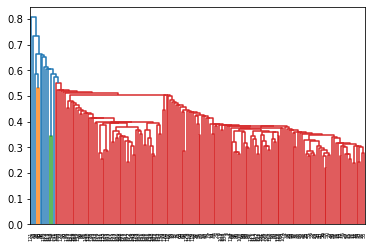

In [7]:
dendrogram = sch.dendrogram(sch.linkage(dfN,method='single'))

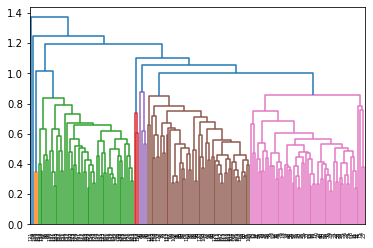

In [8]:
dendrogram = sch.dendrogram(sch.linkage(dfN,method='average'))

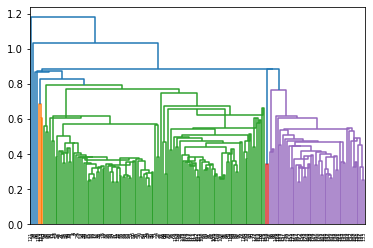

In [10]:
dendrogram = sch.dendrogram(sch.linkage(dfN,method='centroid'))

In [11]:
hc=AgglomerativeClustering(n_clusters =4,affinity='euclidean',linkage='average')

In [12]:
y_hc=hc.fit_predict(dfN)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [13]:
df1=df
df1["Cluster"]=Clusters
df1.head(2)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0


In [14]:
# KMeans Clustering


In [16]:
inertia = []
for i in range (1,10):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(dfN)
    inertia.append(kmeans.inertia_)

C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory le

Text(0, 0.5, 'Inertia')

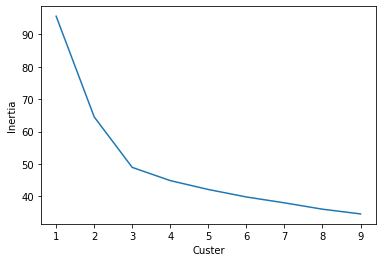

In [17]:
plt.plot(range(1,10),inertia)
plt.xlabel('Custer')
plt.ylabel('Inertia')

In [18]:
clusterN=KMeans(3,random_state=1)
clusterN.fit(dfN)

C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [19]:
clusterN.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [20]:
df2=df
df2.head(2)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0


In [21]:
df2["Cluster_Kmean"]=clusterN.labels_
df2.head(2)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster,Cluster_Kmean
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,2


In [22]:
df2.groupby('Cluster_Kmean').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster_Kmean,,,,,,,,,,,,,,,
0,2.000000,12.213226,1.938710,2.244355,20.298387,92.790323,2.293871,2.152581,0.348226,1.669839,3.011452,1.062419,2.877903,497.274194,0.080645
1,2.872727,13.099818,3.160909,2.407455,21.043636,98.654545,1.689818,0.847818,0.457818,1.133636,6.936545,0.716836,1.709273,624.854545,0.963636
2,1.032787,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344,0.000000


In [23]:
# PCA

In [28]:
dfN.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [32]:
pca=PCA()
pca_values=pca.fit_transform(dfN)
pca_values

array([[-0.70633576, -0.25319275,  0.02409269, ...,  0.04971144,
        -0.02001158, -0.00872296],
       [-0.4849768 , -0.00882289, -0.28048205, ...,  0.07415784,
        -0.05083753, -0.00524944],
       [-0.52117227, -0.18918722,  0.19621674, ...,  0.0121311 ,
        -0.10418449, -0.02316441],
       ...,
       [ 0.62631289, -0.54685701, -0.03049476, ...,  0.13116697,
         0.11160576,  0.0389133 ],
       [ 0.5729911 , -0.42551609, -0.09453672, ...,  0.03027458,
         0.05732893,  0.01103053],
       [ 0.701764  , -0.51350498,  0.29390996, ..., -0.02784028,
         0.01873501, -0.06648261]])

In [ ]:
pca=PCA(n_components=3)
pca_values=pca.fit_transform(dfN)


In [33]:
# Amount of Varience each PCA explains

In [36]:
var=pca.explained_variance_ratio_
var

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

In [38]:
varN=np.cumsum(var)
varN

array([0.40749485, 0.59719836, 0.68281507, 0.75708185, 0.81273486,
       0.85932323, 0.89596252, 0.92005041, 0.94279412, 0.96530376,
       0.97911669, 0.99184905, 1.        ])

In [ ]:
# so for the first 3 PCA the percentage is around 68%

In [40]:
pca.components_

array([[-1.33367664e-01,  2.48515807e-01, -7.39167565e-04,
         1.77838621e-01, -8.86572802e-02, -3.95070868e-01,
        -4.14589792e-01,  3.33108614e-01, -2.52902105e-01,
         9.23290406e-02, -2.51137258e-01, -4.73492101e-01,
        -2.86862112e-01],
       [-5.50883679e-01, -2.27390577e-01, -1.63091200e-01,
         7.97763293e-02, -1.88165658e-01, -7.41447292e-02,
        -1.00692215e-03, -9.96036899e-03, -3.14178847e-02,
        -5.19707496e-01,  2.37206223e-01,  2.15562246e-01,
        -4.43888361e-01],
       [-8.38483848e-02,  4.92039271e-01,  4.03009367e-01,
         4.77242411e-01,  6.55069647e-03,  2.53065140e-01,
         1.96105456e-01,  2.85981862e-01,  2.28342345e-01,
        -3.30999741e-02, -1.06588781e-01,  2.97776289e-01,
        -1.51968292e-01],
       [-4.03281504e-02,  4.86032016e-01, -2.41975652e-01,
        -8.16939916e-02,  1.58801742e-02, -5.26432313e-02,
        -2.70332340e-02, -7.09095281e-01,  7.65736687e-02,
        -2.63220354e-02, -3.52498013e

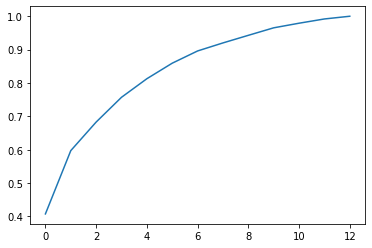

In [41]:
plt.plot(varN)

In [42]:
x=pca_values[:,0]
y=pca_values[:,1]

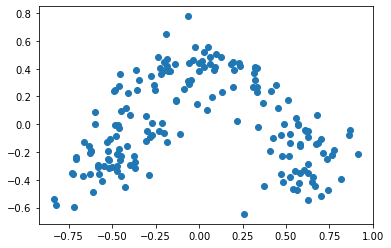

In [43]:
plt.scatter(x,y)

In [44]:
df.head(2)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster,Cluster_Kmean
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,2


In [57]:
df.iloc[:,[0]].head(2)

,Type
0,1
1,1


In [63]:
df.loc[:,['Type']]

,Type
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [68]:
finaldf=pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['PC1','PC2'])])

In [69]:
finaldf.head()

,PC1,PC2
0,-0.706336,-0.253193
1,-0.484977,-0.008823
2,-0.521172,-0.189187
3,-0.821644,-0.580906
4,-0.202546,-0.059467


In [70]:
finaldf.head()

,PC1,PC2
0,-0.706336,-0.253193
1,-0.484977,-0.008823
2,-0.521172,-0.189187
3,-0.821644,-0.580906
4,-0.202546,-0.059467


In [71]:
inertia = []
for i in range (1,10):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(finaldf)
    inertia.append(kmeans.inertia_)

C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory le

Text(0, 0.5, 'Inertia')

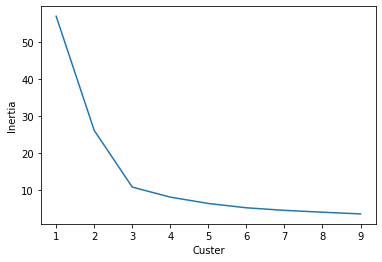

In [72]:
plt.plot(range(1,10),inertia)
plt.xlabel('Custer')
plt.ylabel('Inertia')

In [73]:
clusterN=KMeans(3,random_state=1)
clusterN.fit(finaldf)

C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [74]:
clusterN.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [75]:
finaldf['Type']=df.loc[:,['Type']]

In [76]:
finaldf.head()

,PC1,PC2,Type
0,-0.706336,-0.253193,1
1,-0.484977,-0.008823,1
2,-0.521172,-0.189187,1
3,-0.821644,-0.580906,1
4,-0.202546,-0.059467,1


In [77]:
finaldf['PCA_Kmean_Clusture']=clusterN.labels_

In [78]:
finaldf

,PC1,PC2,Type,PCA_Kmean_Clusture
0,-0.706336,-0.253193,1,0
1,-0.484977,-0.008823,1,0
2,-0.521172,-0.189187,1,0
3,-0.821644,-0.580906,1,0
4,-0.202546,-0.059467,1,0
...,...,...,...,...
173,0.739510,-0.471901,3,1
174,0.581781,-0.348366,3,1
175,0.626313,-0.546857,3,1
176,0.572991,-0.425516,3,1


In [ ]:
# Inferance the total clustures using K Means Match the PCA and 3 is optimum K value for the Given Data Set
